# Import Libraries

In [1]:
# libraries for data handling
import numpy as np 
import pandas as pd

#libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#libraries for interactive graphs
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

# Load Data

source data :https://www.kaggle.com/unsdsn/world-happiness

In [2]:
raw_data = pd.read_csv("2019.csv")

In [3]:
# Copy data to ensure that changes do not impact the raw_data
df = raw_data.copy()

# Review data

In [4]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [6]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [7]:
print("Number of unique overall rankings -", df["Overall rank"].nunique())

Number of unique overall rankings - 156


In [8]:
# Confirming whether scores is an aggregate of other columns
df["Total"] = df[['GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].sum(axis = 1)

if sum(df[df["Total"]!=df["Score"]].any()) == 0:
    print("Scores is an aggregate of other numerical values.")
else: 
    print("Scores include other factors not accounted for by other variables in the dataset.")

Scores include other factors not accounted for by other variables in the dataset.


In [9]:
# confirming the difference between total of numerical values, check, and scores
df[["Score", "Total"]].head()

,Score,Total
0,7.769,5.055
1,7.600,5.206
2,7.554,5.313
3,7.494,5.093
4,7.488,5.094


In [10]:
# drop temp column, total
df.drop("Total", axis = 1, inplace = True)

# Score 

In [11]:
# most common scores
print("The 6 most common scores")
df["Score"].round(2).value_counts().head(6)

The 6 most common scores


5.89    4
5.21    3
5.26    2
5.65    2
6.10    2
6.20    2
Name: Score, dtype: int64

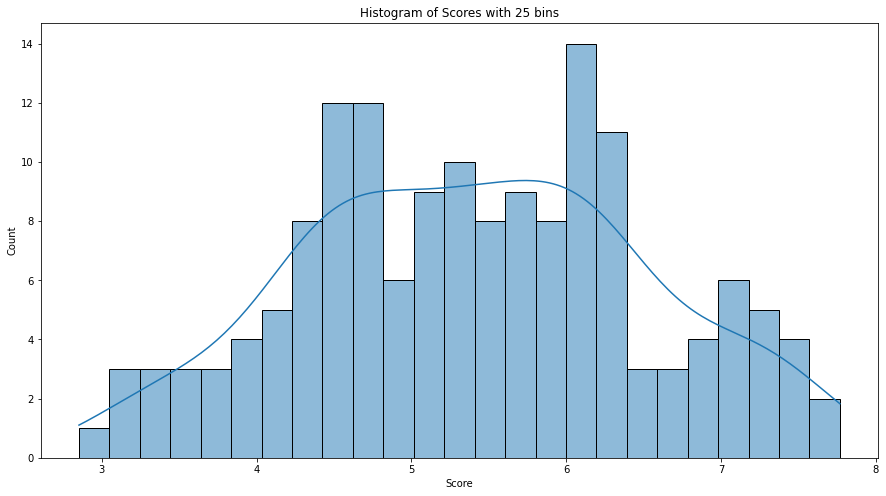

In [12]:
# distribution of scores
plt.figure(figsize=(15,8))
sns.histplot(df["Score"], kde = True, bins = 25)
plt.title("Histogram of Scores with 25 bins")
plt.show()

# Unhappy nations

In [13]:
# nations with the lowest scores 
df.nsmallest(5, ["Score"])

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411


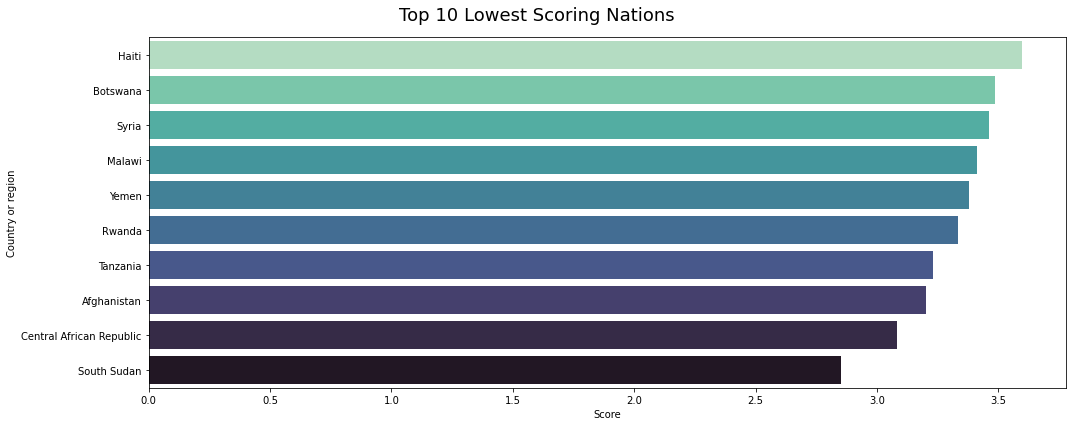

In [14]:
# graphic representation of nations with lowest scores 
plt.figure(figsize=(15,6))
sns.barplot(y = "Country or region", x = "Score", data = df.tail(10), palette = "mako_r")
plt.suptitle("Top 10 Lowest Scoring Nations", fontsize = 18)
plt.tight_layout()

In [15]:
# countries with lowest level of freedom
LowFreedom = df.nsmallest(10, ["Freedom to make life choices"])
LowFreedom

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
121,122,Mauritania,4.490,0.570,1.167,0.489,0.066,0.106,0.088
81,82,Greece,5.287,1.181,1.156,0.999,0.067,0.000,0.034
87,88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114
141,142,Comoros,3.973,0.274,0.757,0.505,0.142,0.275,0.078
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
142,143,Madagascar,3.933,0.274,0.916,0.555,0.148,0.169,0.041


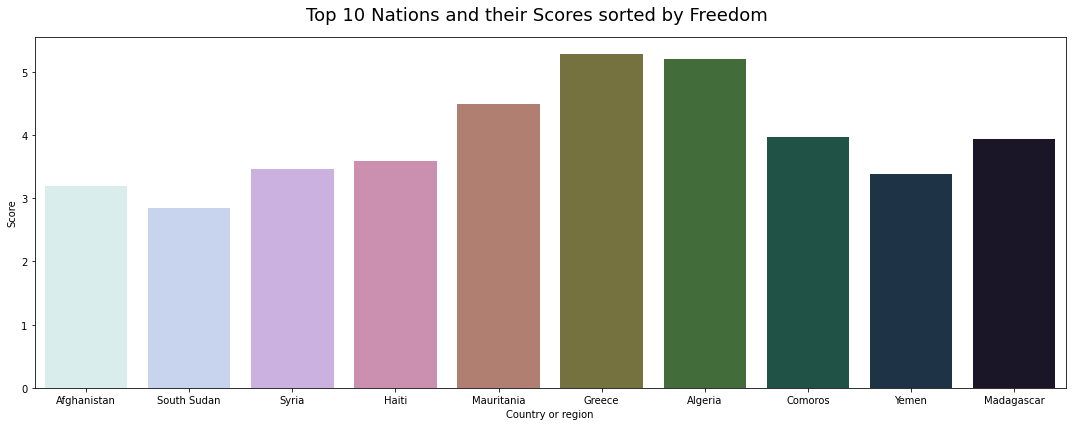

In [16]:
# graphic representation of nations with lowest level of freedom 
plt.figure(figsize=(15,6))
sns.barplot(x = "Country or region", y = "Score", data = LowFreedom, palette = "cubehelix_r")
plt.suptitle("Top 10 Nations and their Scores sorted by Freedom", fontsize = 18)
plt.tight_layout()

In [17]:
# countries with lowest level of GDP
LowGDP = df.nsmallest(5, ["GDP per capita"])
LowGDP

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
111,112,Somalia,4.668,0.000,0.698,0.268,0.559,0.243,0.270
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
144,145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180
140,141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033
126,127,Congo (Kinshasa),4.418,0.094,1.125,0.357,0.269,0.212,0.053


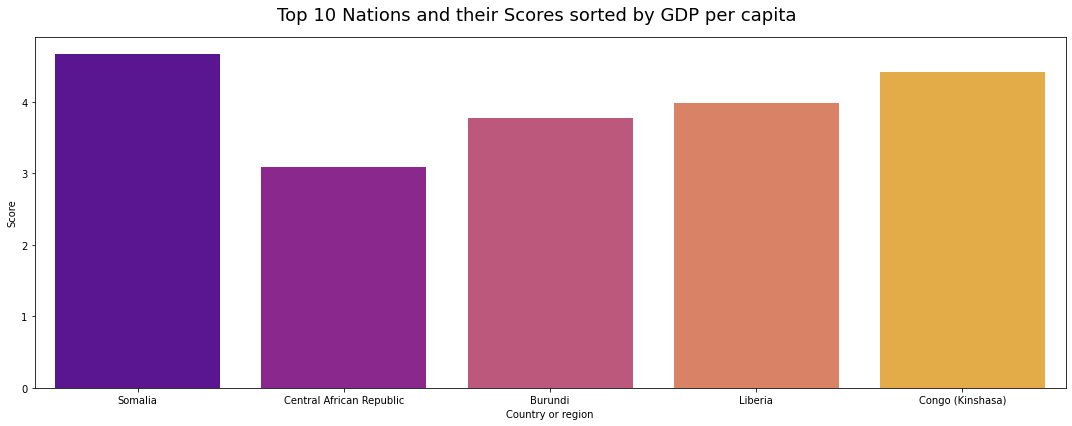

In [18]:
# graphic representation of nations with lowest level of GDP 

plt.figure(figsize=(15,6))
sns.barplot(x = "Country or region", y = "Score", data = LowGDP.head(10), palette = 'plasma')
plt.suptitle("Top 10 Nations and their Scores sorted by GDP per capita", fontsize = 18)
plt.tight_layout()

In [19]:
# sum of GDP and freedom
df["GDP_Freedom"] = df[['GDP per capita',
       'Freedom to make life choices']].sum(axis = 1)

In [20]:
# examining nations with the lowest GDP and freedom 
df[['Overall rank', 'Country or region', 'Score', 'GDP per capita',
    'Freedom to make life choices', 'GDP_Freedom']] .sort_values(by = ["GDP_Freedom"], ascending= True).head(10)

,Overall rank,Country or region,Score,GDP per capita,Freedom to make life choices,GDP_Freedom
154,155,Central African Republic,3.083,0.026,0.225,0.251
144,145,Burundi,3.775,0.046,0.220,0.266
155,156,South Sudan,2.853,0.306,0.010,0.316
146,147,Haiti,3.597,0.323,0.026,0.349
153,154,Afghanistan,3.203,0.350,0.000,0.350
126,127,Congo (Kinshasa),4.418,0.094,0.269,0.363
141,142,Comoros,3.973,0.274,0.142,0.416
142,143,Madagascar,3.933,0.274,0.148,0.422
150,151,Yemen,3.380,0.287,0.143,0.430
140,141,Liberia,3.975,0.073,0.370,0.443


# GDP and Happiness 

In [21]:
# countries with the highest GDP 
df.nlargest(10, ["GDP per capita"])

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,GDP_Freedom
28,29,Qatar,6.374,1.684,1.313,0.871,0.555,0.220,0.167,2.239
13,14,Luxembourg,7.090,1.609,1.479,1.012,0.526,0.194,0.316,2.135
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453,2.128
20,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182,2.101
50,51,Kuwait,6.021,1.500,1.319,0.808,0.493,0.142,0.097,1.993
15,16,Ireland,7.021,1.499,1.553,0.999,0.516,0.298,0.310,2.015
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2.091
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,2.024
75,76,Hong Kong,5.430,1.438,1.277,1.122,0.440,0.258,0.287,1.878
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128,1.887


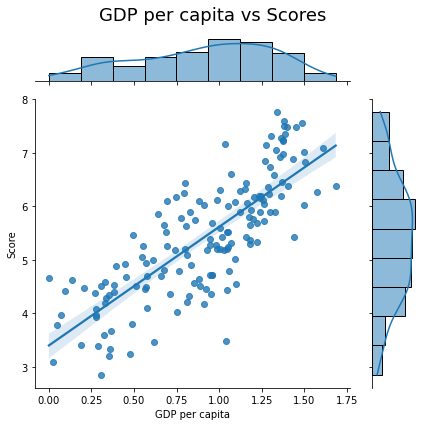

In [22]:
# relationship between GDP and scores 
sns.jointplot( x="GDP per capita",y='Score',data=df,kind='reg' )
plt.suptitle("GDP per capita vs Scores", fontsize = 18)
plt.tight_layout()

# Relationships between datasets


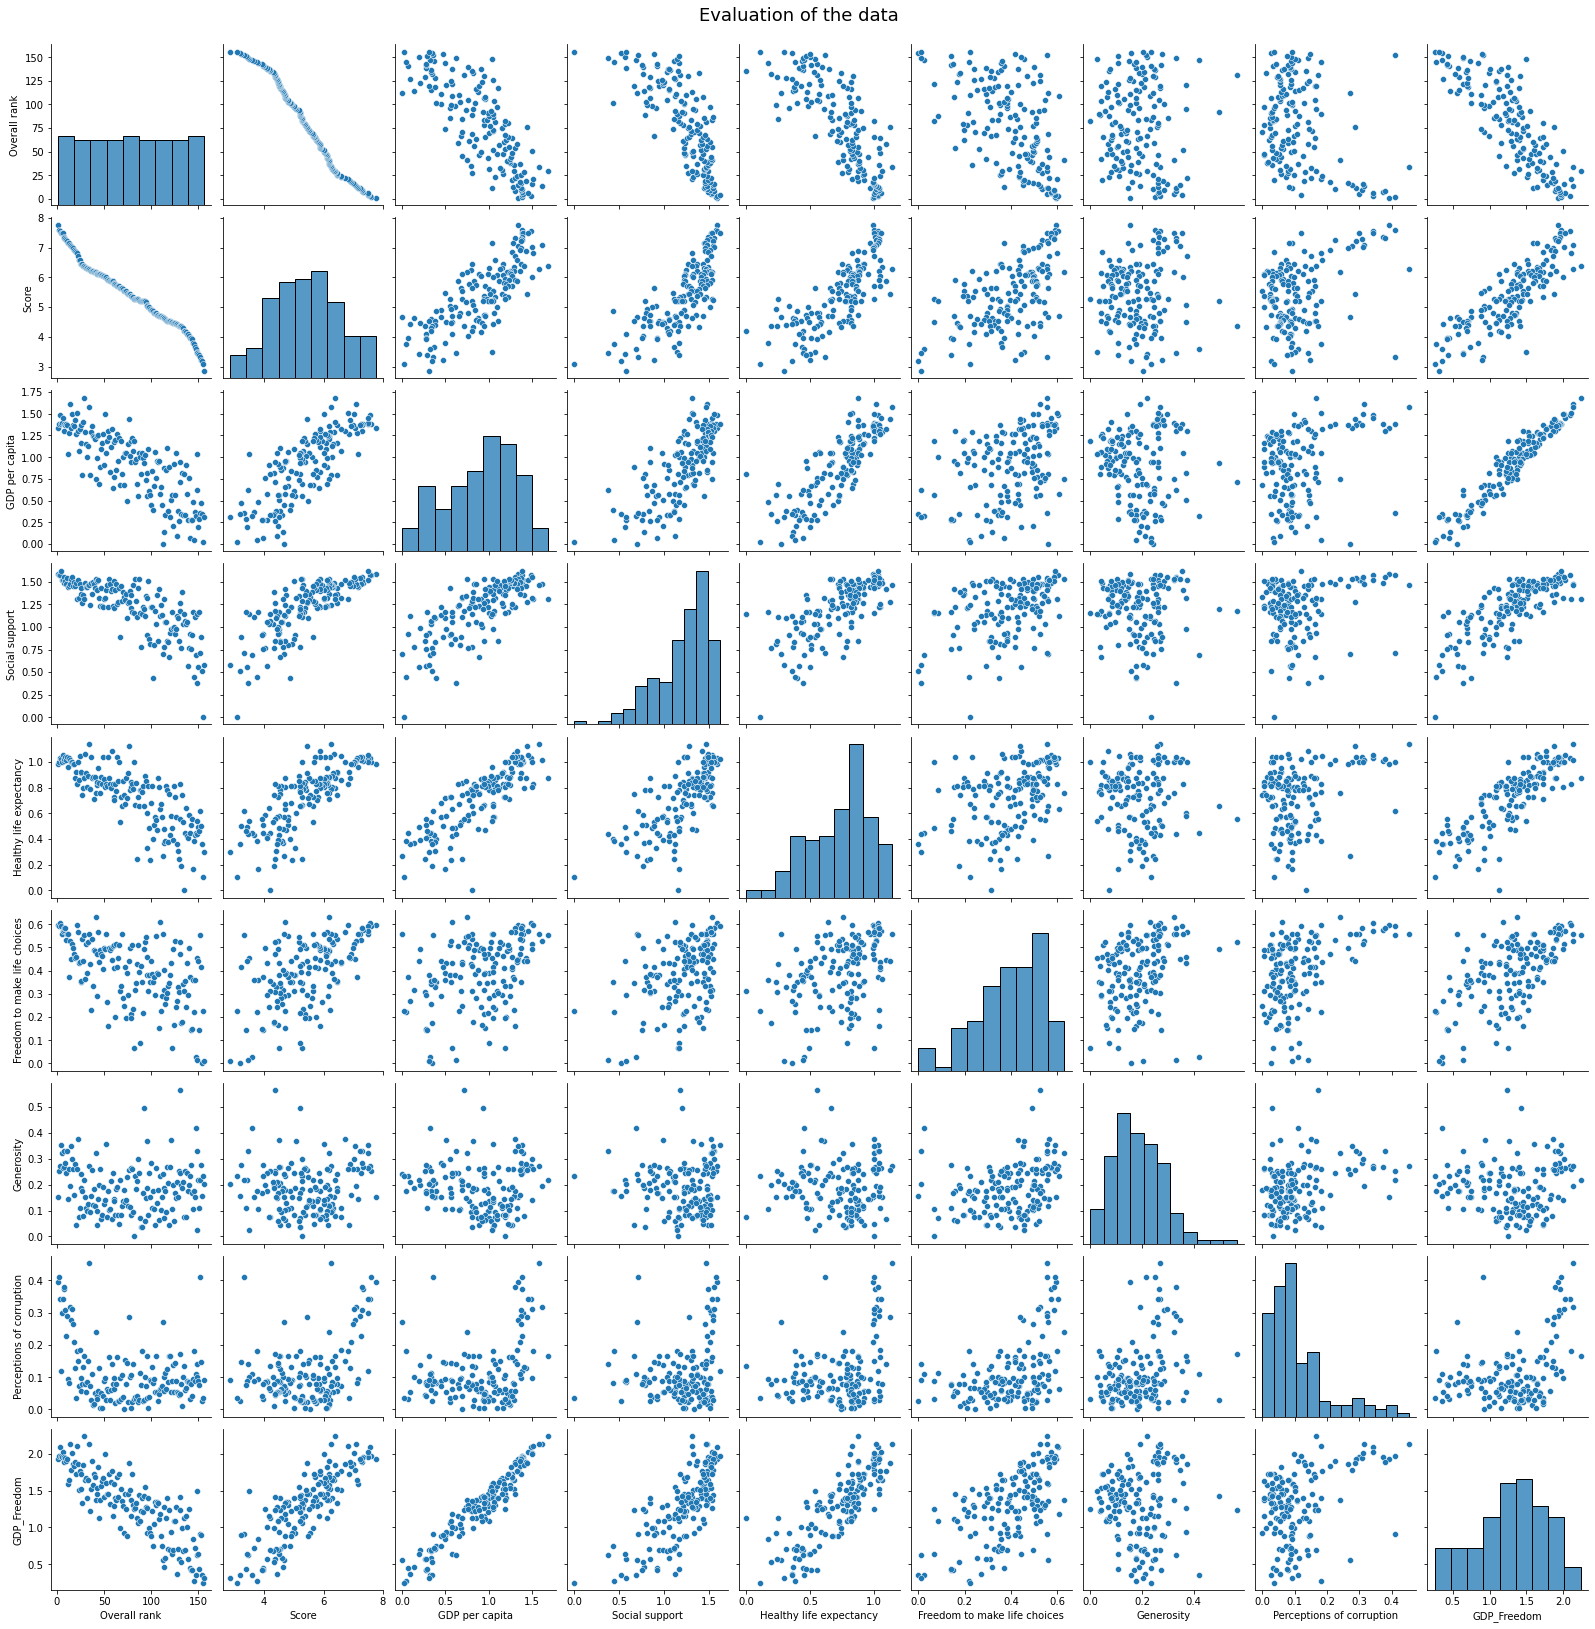

In [23]:
# relationships between variables
sns.pairplot(df)
plt.suptitle("Evaluation of the data", fontsize = 18, y = 1.01)
plt.show()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,GDP_Freedom
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959,-0.843307
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613,0.842613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920,0.959683
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899,0.773425
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283,0.824162
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843,0.623901
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538,0.014658
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000,0.385750
GDP_Freedom,-0.843307,0.842613,0.959683,0.773425,0.824162,0.623901,0.014658,0.385750,1.000000


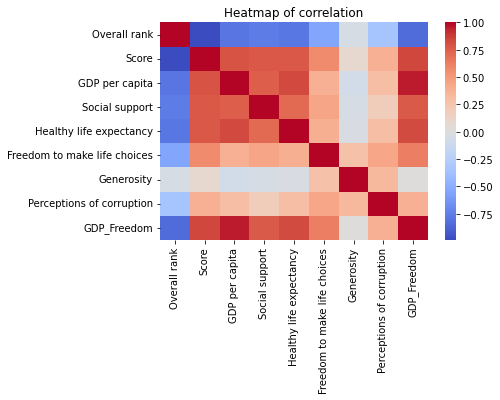

In [24]:
# correlation between variables
sns.heatmap(df.corr(), cmap = "coolwarm")
plt.title("Heatmap of correlation", fontsize = 12)

df.corr()

# Generosity and Social Support

Text(0.5, 0.98, 'Relationship between Generosity and Social support')

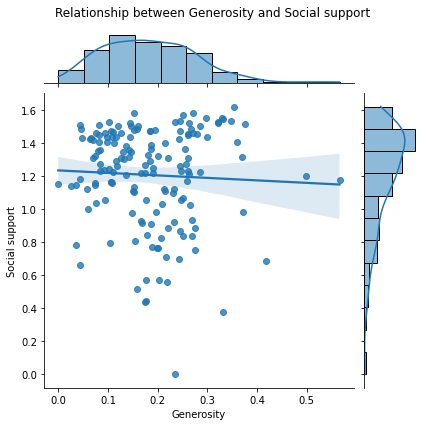

In [25]:
# relationship between generosity and social support
sns.jointplot(x = "Generosity", y = "Social support", data = df, kind = "reg")
plt.subplots_adjust(top=0.92)
plt.suptitle("Relationship between Generosity and Social support")

# Choropleth of Happiness Score

In [26]:
# coding to extract plotly graphs

#import chart_studio
#username = xxx
#api_key = xxx

#chart_studio.tools.set_credentials_file(username=username, api_key= api_key )
#import chart_studio.plotly as py
#import chart_studio.tools as tls

In [27]:
# create variables for choromap
data = dict(
        type = 'choropleth',
        colorscale = 'magma',
        reversescale = False,
        locations = df['Country or region'],
        locationmode = "country names",
        z = df["Score"],
        text = df['Country or region'],
        colorbar = {'title' : 'Happiness Score'},
      ) 

layout = dict(title = '2019 Happiness index',
                geo = dict(showframe = False,projection = {'type':'mercator'})
             )

In [28]:
# create choromap
plt.figure(figsize=(15,10))
choromap = go.Figure(data = [data],layout = layout)

#code to extract plotly graph
#py.plot(choromap, filename = "2019 Happiness index", auto_open = False)


choromap.show()

<Figure size 1080x720 with 0 Axes>